# Final Project_ Adel Alkhaibari


##  Import Modules

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
from datetime import date

In [140]:
%matplotlib inline
#rcParams['figure.figsize'] = 10,10
#rcParams['font.size'] = 15
sns.set_style('whitegrid')
sns.set_palette("pastel")

## Reading the Data

In [141]:
# Read in the CSV file into a Pandas Dataframe.
sqf = pd.read_csv('sqf-2019.csv') 

In [142]:
# shape = (rows, columns)
sqf.shape

(13459, 83)

In [143]:
sqf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 83 columns):
STOP_ID_ANONY                                                 13459 non-null int64
STOP_FRISK_DATE                                               13459 non-null object
STOP_FRISK_TIME                                               13459 non-null object
YEAR2                                                         13459 non-null int64
MONTH2                                                        13459 non-null object
DAY2                                                          13459 non-null object
STOP_WAS_INITIATED                                            13459 non-null object
RECORD_STATUS_CODE                                            13459 non-null object
ISSUING_OFFICER_RANK                                          13459 non-null object
ISSUING_OFFICER_COMMAND_CODE                                  13459 non-null int64
SUPERVISING_OFFICER_RANK                              

In [144]:
print ('Last Updated:' + str(sqf.STOP_FRISK_DATE. max()))

Last Updated:9/9/2019


In [145]:
sqf.sample(5)

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
8002,8003,5/31/2019,23:02:00,2019,May,Friday,Based on Radio Run,APP,POM,72,...,72,A,(null),20 STREET && 5 AVENUE,20 STREET,986237,180428,(null),PBBS,BROOKLYN
6849,6850,9/21/2019,1:48:00,2019,September,Saturday,Based on Self Initiated,APP,POM,63,...,63,D,(null),RALPH AVENUE && GLENWOOD ROAD,RALPH AVENUE,1006773,170446,(null),PBBS,BROOKLYN
1948,1949,3/21/2019,21:02:00,2019,March,Thursday,Based on Self Initiated,APP,POM,23,...,23,D,(null),PARK AVENUE && EAST 112 STREET,PARK AVENUE,999452,229564,(null),PBMN,MANHATTAN
6612,6613,5/14/2019,14:45:00,2019,May,Tuesday,Based on C/W on Scene,APP,POM,62,...,62,C,(null),2164 86 STREET,86 STREET,985793,158720,(null),PBBS,BROOKLYN
5616,5617,11/27/2019,0:00:00,2019,November,Wednesday,Based on Radio Run,APP,POM,48,...,48,B,(null),EAST 182 STREET && PARK AVENUE,EAST 182 STREET,1013256,250659,(null),PBBX,BRONX


In [146]:
# Quick peek at the first few rows of the dataframe
sqf.head()

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/2/2019,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,1/8/2019,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,1/12/2019,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,1/14/2019,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
4,5,1/15/2019,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN


## Preparing the Data

In [147]:
# Check both my data types as well as a count of data types
# 74 non-numeric columns and only 9 numeric columns
sqf.dtypes.value_counts()

object    74
int64      9
dtype: int64

### Exploring Missing Values

In [148]:
# Missing values in the sqf DataFrame
sqf.isnull().sum()[sqf.isnull().sum() != 0].sort_values(ascending=False)

DEMEANOR_OF_PERSON_STOPPED                1193
DEMEANOR_CODE                             1147
SUSPECT_OTHER_DESCRIPTION                  814
STOP_LOCATION_APARTMENT                     17
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION       6
dtype: int64

In [149]:
missing = pd.concat([sqf.isnull().sum()[sqf.isnull().sum() != 0]\
                     .sort_values(ascending=False), 
                     ((sqf.isnull().sum()[sqf.isnull().sum() != 0]\
                      .sort_values(ascending=False)/sqf.shape[0])*100)], axis=1)
names = ['count', 'percentage']
missing.columns = names
missing

,count,percentage
DEMEANOR_OF_PERSON_STOPPED,1193,8.863957
DEMEANOR_CODE,1147,8.522178
SUSPECT_OTHER_DESCRIPTION,814,6.047998
STOP_LOCATION_APARTMENT,17,0.126310
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,6,0.044580


### Exploring the Unique Values

In [150]:
# Number of unique values in the sqf DataFrame
sqf.nunique().sort_values()


# Columns with only 1 unique value are generally not useful due to no variation
# This is a way to get a sense of categorical/discrete/continuous

DEMEANOR_CODE                                                     1
YEAR2                                                             1
PHYSICAL_FORCE_RESTRAINT_USED_FLAG                                1
RECORD_STATUS_CODE                                                1
PHYSICAL_FORCE_OC_SPRAY_USED_FLAG                                 2
ID_CARD_IDENTIFIES_OFFICER_FLAG                                   2
SHIELD_IDENTIFIES_OFFICER_FLAG                                    2
VERBAL_IDENTIFIES_OFFICER_FLAG                                    2
FRISKED_FLAG                                                      2
SEARCHED_FLAG                                                     2
OTHER_CONTRABAND_FLAG                                             2
FIREARM_FLAG                                                      2
KNIFE_CUTTER_FLAG                                                 2
WEAPON_FOUND_FLAG                                                 2
OFFICER_IN_UNIFORM_FLAG                         

In [151]:
#to understand more the data we have to see the describe data
sqf.describe()

,STOP_ID_ANONY,YEAR2,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_COMMAND_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
count,13459.000000,13459.0,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,1.345900e+04,13459.000000
mean,6730.000000,2019.0,163.182554,164.517572,4.485846,11.161008,61.719370,1.004752e+06,206446.790698
std,3885.422971,0.0,245.462983,245.358903,63.971765,18.426165,33.815675,2.073875e+04,30346.980725
min,1.000000,2019.0,1.000000,1.000000,0.000000,0.000000,1.000000,9.143460e+05,121681.000000
25%,3365.500000,2019.0,43.000000,43.000000,1.000000,5.000000,33.000000,9.934505e+05,183642.000000
50%,6730.000000,2019.0,75.000000,75.000000,1.000000,8.000000,63.000000,1.002636e+06,204731.000000
75%,10094.500000,2019.0,111.000000,112.000000,1.000000,14.000000,84.000000,1.014774e+06,232885.500000
max,13459.000000,2019.0,879.000000,879.000000,2350.000000,928.000000,123.000000,1.067113e+06,271349.000000


In [152]:
#Check for NAN values
sqf.isna().any()

STOP_ID_ANONY                               False
STOP_FRISK_DATE                             False
STOP_FRISK_TIME                             False
YEAR2                                       False
MONTH2                                      False
DAY2                                        False
STOP_WAS_INITIATED                          False
RECORD_STATUS_CODE                          False
ISSUING_OFFICER_RANK                        False
ISSUING_OFFICER_COMMAND_CODE                False
SUPERVISING_OFFICER_RANK                    False
SUPERVISING_OFFICER_COMMAND_CODE            False
LOCATION_IN_OUT_CODE                        False
JURISDICTION_CODE                           False
JURISDICTION_DESCRIPTION                    False
OBSERVED_DURATION_MINUTES                   False
SUSPECTED_CRIME_DESCRIPTION                 False
STOP_DURATION_MINUTES                       False
OFFICER_EXPLAINED_STOP_FLAG                 False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION       True


In [153]:
#we found that we have 4 nan values, OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,DEMEANOR_CODE,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_APARTMENT  

In [154]:
#in this code we need to fill the value as 0 for OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION
sqf['OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION'].fillna(0,inplace=True)
sqf.isna().any()

STOP_ID_ANONY                               False
STOP_FRISK_DATE                             False
STOP_FRISK_TIME                             False
YEAR2                                       False
MONTH2                                      False
DAY2                                        False
STOP_WAS_INITIATED                          False
RECORD_STATUS_CODE                          False
ISSUING_OFFICER_RANK                        False
ISSUING_OFFICER_COMMAND_CODE                False
SUPERVISING_OFFICER_RANK                    False
SUPERVISING_OFFICER_COMMAND_CODE            False
LOCATION_IN_OUT_CODE                        False
JURISDICTION_CODE                           False
JURISDICTION_DESCRIPTION                    False
OBSERVED_DURATION_MINUTES                   False
SUSPECTED_CRIME_DESCRIPTION                 False
STOP_DURATION_MINUTES                       False
OFFICER_EXPLAINED_STOP_FLAG                 False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION      False


In [155]:
sqf['SUSPECT_OTHER_DESCRIPTION'].fillna(0,inplace=True)
sqf.isna().any()

STOP_ID_ANONY                               False
STOP_FRISK_DATE                             False
STOP_FRISK_TIME                             False
YEAR2                                       False
MONTH2                                      False
DAY2                                        False
STOP_WAS_INITIATED                          False
RECORD_STATUS_CODE                          False
ISSUING_OFFICER_RANK                        False
ISSUING_OFFICER_COMMAND_CODE                False
SUPERVISING_OFFICER_RANK                    False
SUPERVISING_OFFICER_COMMAND_CODE            False
LOCATION_IN_OUT_CODE                        False
JURISDICTION_CODE                           False
JURISDICTION_DESCRIPTION                    False
OBSERVED_DURATION_MINUTES                   False
SUSPECTED_CRIME_DESCRIPTION                 False
STOP_DURATION_MINUTES                       False
OFFICER_EXPLAINED_STOP_FLAG                 False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION      False


In [156]:
sqf.head()

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/2/2019,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,1/8/2019,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,1/12/2019,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,1/14/2019,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
4,5,1/15/2019,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN


## Exploring the columns

In [157]:
sqf.columns

Index(['STOP_ID_ANONY', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'RECORD_STATUS_CODE',
       'ISSUING_OFFICER_RANK', 'ISSUING_OFFICER_COMMAND_CODE',
       'SUPERVISING_OFFICER_RANK', 'SUPERVISING_OFFICER_COMMAND_CODE',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_OFFENSE',
       'SUMMONS_ISSUED_FLAG', 'SUMMONS_OFFENSE_DESCRIPTION',
       'OFFICER_IN_UNIFORM_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'SHIELD_IDENTIFIES_OFFICER_FLAG', 'VERBAL_IDENTIFIES_OFFICER_FLAG',
       'FRISKED_FLAG', 'SEARCHED_FLAG', 'ASK_FOR_CONSENT_FLG',
       'CONSENT_GIVEN_FLG', 'OTHER_CONTRABAND_FLAG', 'FIREARM_FLAG',
       'KNIFE_CUTTER_FLAG', 'OTHER_WEAPON_F

In [158]:
sqf.SUSPECT_SEX.isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
13429    False
13430    False
13431    False
13432    False
13433    False
13434    False
13435    False
13436    False
13437    False
13438    False
13439    False
13440    False
13441    False
13442    False
13443    False
13444    False
13445    False
13446    False
13447    False
13448    False
13449    False
13450    False
13451    False
13452    False
13453    False
13454    False
13455    False
13456    False
13457    False
13458    False
Name: SUSPECT_SEX, Length: 13459, dtype: bool

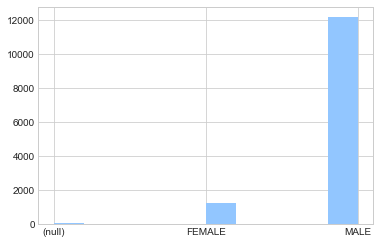

In [159]:
sqf.SUSPECT_SEX.hist();

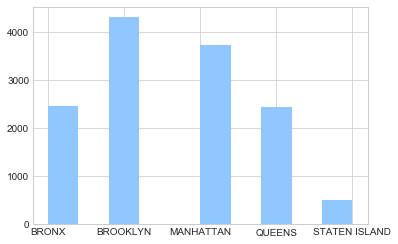

In [160]:
sqf.STOP_LOCATION_BORO_NAME.hist();

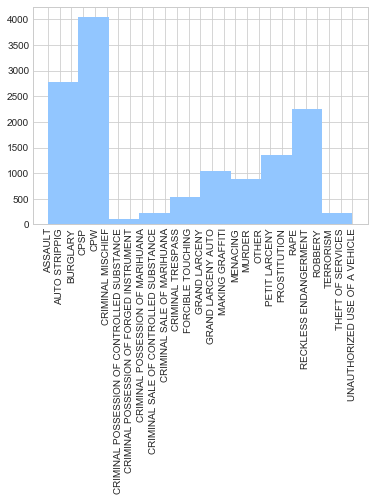

In [243]:
sqf.SUSPECTED_CRIME_DESCRIPTION.hist();
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

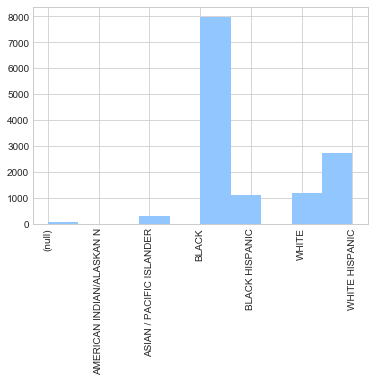

In [230]:
sqf.SUSPECT_RACE_DESCRIPTION.hist();
plt.xticks(rotation=90)
#sqf['SUSPECT_RACE_DESCRIPTION_num'].tail(5).plot(kind='bar')

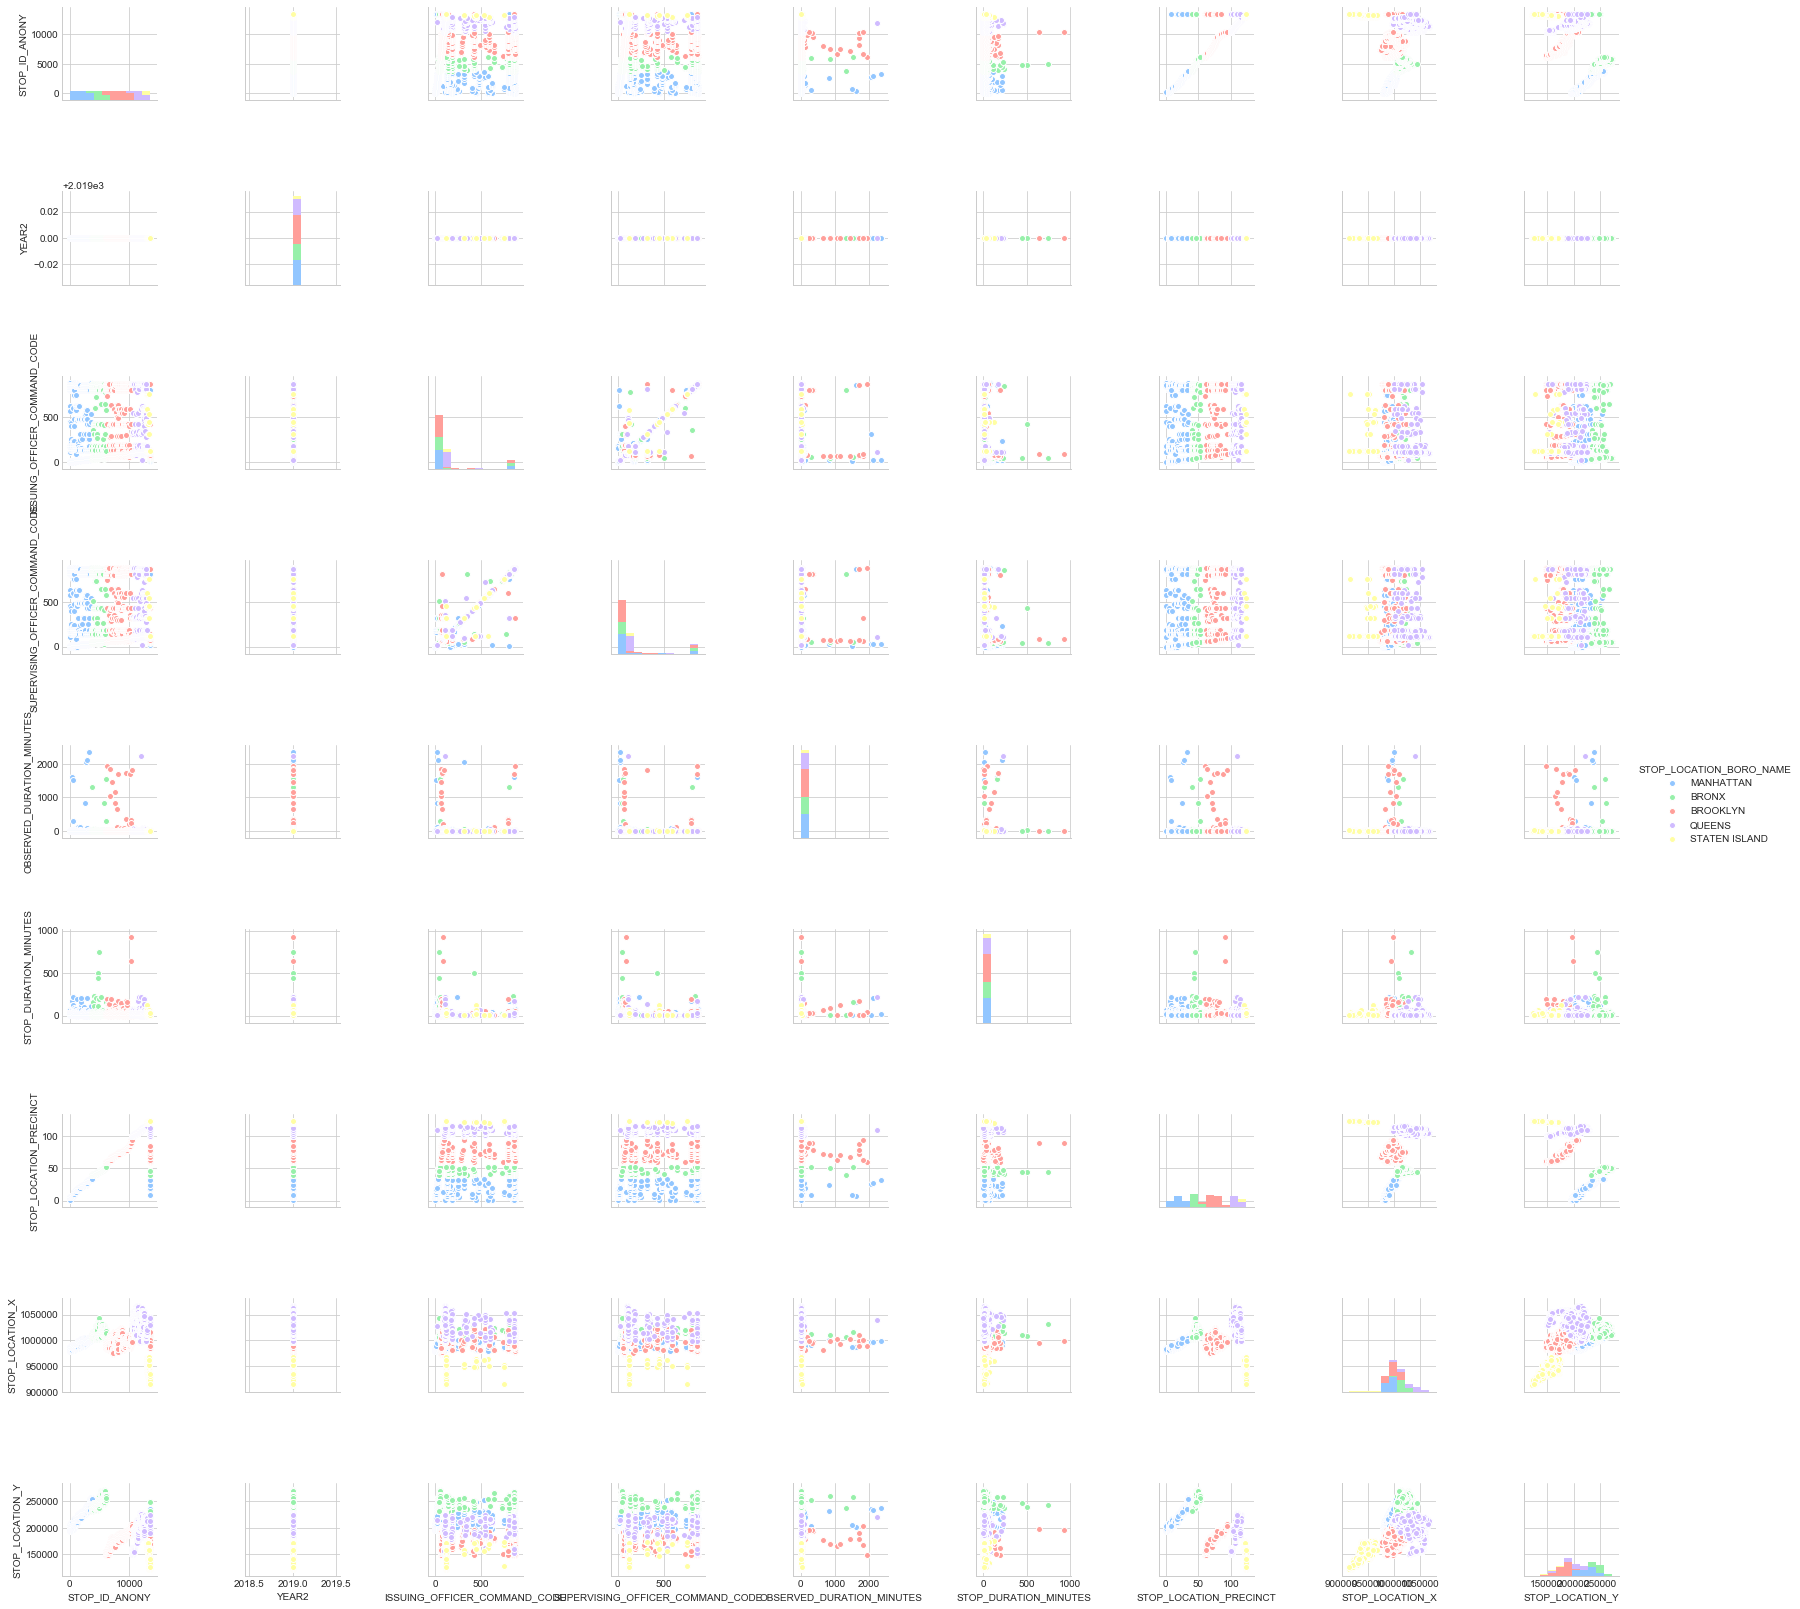

In [163]:
sns.pairplot(sqf, hue="STOP_LOCATION_BORO_NAME");

In [164]:
sqf.corr()

,STOP_ID_ANONY,YEAR2,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_COMMAND_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
STOP_ID_ANONY,1.000000,NaN,-0.012014,-0.011980,-0.006411,0.016077,0.991247,0.246873,-0.503514
YEAR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISSUING_OFFICER_COMMAND_CODE,-0.012014,NaN,1.000000,0.992279,0.016003,-0.005573,-0.012433,-0.027385,-0.011801
SUPERVISING_OFFICER_COMMAND_CODE,-0.011980,NaN,0.992279,1.000000,0.014987,-0.008419,-0.012256,-0.023294,-0.008865
OBSERVED_DURATION_MINUTES,-0.006411,NaN,0.016003,0.014987,1.000000,0.139431,-0.006807,-0.008009,-0.002826
STOP_DURATION_MINUTES,0.016077,NaN,-0.005573,-0.008419,0.139431,1.000000,0.018191,-0.005317,-0.037195
STOP_LOCATION_PRECINCT,0.991247,NaN,-0.012433,-0.012256,-0.006807,0.018191,1.000000,0.256384,-0.513954
STOP_LOCATION_X,0.246873,NaN,-0.027385,-0.023294,-0.008009,-0.005317,0.256384,1.000000,0.231210
STOP_LOCATION_Y,-0.503514,NaN,-0.011801,-0.008865,-0.002826,-0.037195,-0.513954,0.231210,1.000000


In [165]:
sqf.tail(5)

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
13454,13455,12/30/2019,13:20:00,2019,December,Monday,Based on Self Initiated,APP,POM,103,...,103,C,(null),SUTPHIN BOULEVARD && 94 AVENUE,SUTPHIN BOULEVARD,1037778,194006,(null),PBQS,QUEENS
13455,13456,1/7/2019,2:51:00,2019,January,Monday,Based on Self Initiated,APP,POM,107,...,107,D,(null),JEWEL AVENUE && 147 STREET,JEWEL AVENUE,1033722,205506,(null),PBQS,QUEENS
13456,13457,12/30/2019,14:35:00,2019,December,Monday,Based on Radio Run,APP,POM,109,...,109,C,(null),COLLEGE POINT BOULEVARD && 15 AVENUE,COLLEGE POINT BOULEVARD,1026950,225017,(null),PBQN,QUEENS
13457,13458,12/14/2019,3:30:00,2019,December,Saturday,Based on Radio Run,APP,SGT,109,...,109,B,(null),COLLEGE POINT BOULEVARD && POPLE AVENUE,COLLEGE POINT BOULEVARD,1030630,213662,(null),PBQN,QUEENS
13458,13459,11/29/2019,14:10:00,2019,November,Friday,Based on Radio Run,APP,POM,113,...,113,C,(null),LINDEN BOULEVARD && 157 STREET,LINDEN BOULEVARD,1042383,189913,(null),PBQS,QUEENS


In [166]:
sqf['STOP_LOCATION_BORO_NAME'] = sqf.STOP_LOCATION_BORO_NAME.astype(object)

In [167]:
sqf.sample(5)

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
5420,5421,3/6/2019,23:45:00,2019,March,Wednesday,Based on Self Initiated,APP,POM,48,...,48,C,(null),EAST TREMONT AVENUE && MARMION AVENUE,EAST TREMONT AVENUE,1015559,246534,(null),PBBX,BRONX
5446,5447,4/7/2019,19:59:00,2019,April,Sunday,Based on Self Initiated,APP,POM,48,...,48,D,(null),EAST 177 STREET && DEVOE AVENUE,EAST 177 STREET,1017978,244925,(null),PBBX,BRONX
4303,4304,11/11/2019,20:58:00,2019,November,Monday,Based on Self Initiated,APP,POM,42,...,42,B,(null),BOONE AVENUE && CROSS BRONX EXPRESSWAY,BOONE AVENUE,1008690,238862,(null),PBBX,BRONX
4134,4135,3/15/2019,17:50:00,2019,March,Friday,Based on Radio Run,APP,POM,42,...,42,C,(null),500 EAST 165 STREET,EAST 165 STREET,1009561,240495,(null),PBBX,BRONX
4970,4971,2/8/2019,16:37:00,2019,February,Friday,Based on C/W on Scene,APP,POM,46,...,46,D,(null),2021 DAVIDSON AVENUE,DAVIDSON AVENUE,1009405,250136,(null),PBBX,BRONX


In [168]:
#Remove a row or a column from a dataframe which has a NaN or no values in i
sqf.dropna(axis=0)

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/2/2019,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,1/8/2019,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,1/12/2019,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,1/14/2019,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
5,6,1/23/2019,6:16:00,2019,January,Wednesday,Based on Radio Run,APP,POM,1,...,1,B,(null),8 STONE STREET,STONE STREET,980765,195773,(null),PBMS,MANHATTAN
6,7,1/24/2019,12:16:00,2019,January,Thursday,Based on Radio Run,APP,POM,1,...,1,B,(null),42 BROADWAY,BROADWAY,980671,196590,(null),PBMS,MANHATTAN
7,8,1/22/2019,6:16:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,B,(null),8 STONE STREET,STONE STREET,980765,195773,(null),PBMS,MANHATTAN
8,9,2/4/2019,14:09:00,2019,February,Monday,Based on Radio Run,APP,POM,1,...,1,A,(null),60 WALL STREET,WALL STREET,981863,196460,(null),PBMS,MANHATTAN
9,10,2/11/2019,9:05:00,2019,February,Monday,Based on C/W on Scene,APP,POM,861,...,1,A,(null),NASSAU STREET && FULTON STREET,NASSAU STREET,982103,198029,(null),PBMS,MANHATTAN
10,11,2/16/2019,12:17:00,2019,February,Saturday,Based on Self Initiated,APP,POM,1,...,1,A,(null),100 BROADWAY,BROADWAY,981097,197271,(null),PBMS,MANHATTAN


In [169]:
sqf.dropna(axis=1)

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/2/2019,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,UNKNOWN,1,C,230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,1/8/2019,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,(null),1,C,9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,1/12/2019,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,"BLACK LONG COAT, BLACK PANTS, BLACK FEDORA HAT...",1,D,131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,1/14/2019,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,(null),1,(,GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
4,5,1/15/2019,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,(null),1,D,32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN
5,6,1/23/2019,6:16:00,2019,January,Wednesday,Based on Radio Run,APP,POM,1,...,BLACK WOODED JACKET,1,B,8 STONE STREET,STONE STREET,980765,195773,(null),PBMS,MANHATTAN
6,7,1/24/2019,12:16:00,2019,January,Thursday,Based on Radio Run,APP,POM,1,...,0,1,B,42 BROADWAY,BROADWAY,980671,196590,(null),PBMS,MANHATTAN
7,8,1/22/2019,6:16:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,BLACK SWEATSHIRT DU-RAG,1,B,8 STONE STREET,STONE STREET,980765,195773,(null),PBMS,MANHATTAN
8,9,2/4/2019,14:09:00,2019,February,Monday,Based on Radio Run,APP,POM,1,...,0,1,A,60 WALL STREET,WALL STREET,981863,196460,(null),PBMS,MANHATTAN
9,10,2/11/2019,9:05:00,2019,February,Monday,Based on C/W on Scene,APP,POM,861,...,"RED BUBBLE JACKET, GRAY SWEATSHIRT, GRAY SWEATS",1,A,NASSAU STREET && FULTON STREET,NASSAU STREET,982103,198029,(null),PBMS,MANHATTAN


In [170]:
sqf.interpolate()

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/2/2019,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,1/8/2019,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,1/12/2019,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,1/14/2019,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
4,5,1/15/2019,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN
5,6,1/23/2019,6:16:00,2019,January,Wednesday,Based on Radio Run,APP,POM,1,...,1,B,(null),8 STONE STREET,STONE STREET,980765,195773,(null),PBMS,MANHATTAN
6,7,1/24/2019,12:16:00,2019,January,Thursday,Based on Radio Run,APP,POM,1,...,1,B,(null),42 BROADWAY,BROADWAY,980671,196590,(null),PBMS,MANHATTAN
7,8,1/22/2019,6:16:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,B,(null),8 STONE STREET,STONE STREET,980765,195773,(null),PBMS,MANHATTAN
8,9,2/4/2019,14:09:00,2019,February,Monday,Based on Radio Run,APP,POM,1,...,1,A,(null),60 WALL STREET,WALL STREET,981863,196460,(null),PBMS,MANHATTAN
9,10,2/11/2019,9:05:00,2019,February,Monday,Based on C/W on Scene,APP,POM,861,...,1,A,(null),NASSAU STREET && FULTON STREET,NASSAU STREET,982103,198029,(null),PBMS,MANHATTAN


In [171]:
print(sqf['SUSPECT_RACE_DESCRIPTION'].value_counts())
#sqf.head(5)

BLACK                        7981
WHITE HISPANIC               2742
WHITE                        1215
BLACK HISPANIC               1127
ASIAN / PACIFIC ISLANDER      301
(null)                         85
AMERICAN INDIAN/ALASKAN N       8
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64


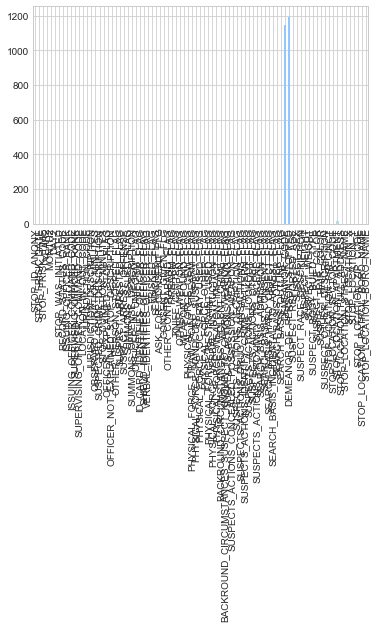

In [172]:
sqf.isnull().sum().plot(kind='bar')

###  Finding the Stop_Location_Boro_Name 

In [173]:
#sum_by_month = sqf.groupby('STOP_LOCATION_BORO_NAME')[['SUSPECT_RACE_DESCRIPTION']].agg([sum]).sort_values(by=('STOP_LOCATION_BORO_NAME','SUSPECT_RACE_DESCRIPTION'))

In [174]:
top_sqf=sqf['STOP_LOCATION_BORO_NAME'].value_counts().reset_index().head(5)
top_sqf

,index,STOP_LOCATION_BORO_NAME
0,BROOKLYN,4311
1,MANHATTAN,3724
2,BRONX,2464
3,QUEENS,2446
4,STATEN ISLAND,514


In [175]:
top_sqf=sqf['DEMEANOR_OF_PERSON_STOPPED'].value_counts().reset_index().head(5)
top_sqf

,index,DEMEANOR_OF_PERSON_STOPPED
0,CALM,3847
1,NERVOUS,1384
2,UPSET,642
3,NORMAL,603
4,COOPERATIVE,383


In [246]:
#sqf.DEMEANOR_OF_PERSON_STOPPED.hist();
#plt.xticks(rotation=90)
#plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

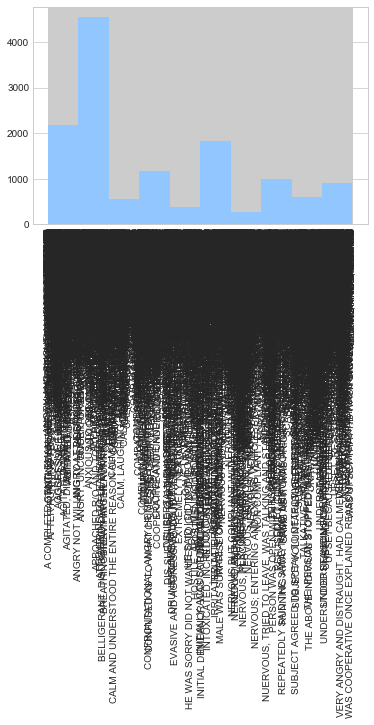

In [239]:
sqf.DEMEANOR_OF_PERSON_STOPPED.hist();
plt.xticks(rotation=90)

In [176]:
#sqf.DEMEANOR_OF_PERSON_STOPPED.hist();

In [177]:
top_sqf=sqf['SUSPECT_SEX'].value_counts().reset_index().head(5)
top_sqf

,index,SUSPECT_SEX
0,MALE,12179
1,FEMALE,1230
2,(null),50


In [178]:
top_sqf=sqf['SUSPECT_RACE_DESCRIPTION'].value_counts().reset_index().head(5)
top_sqf

,index,SUSPECT_RACE_DESCRIPTION
0,BLACK,7981
1,WHITE HISPANIC,2742
2,WHITE,1215
3,BLACK HISPANIC,1127
4,ASIAN / PACIFIC ISLANDER,301


## Predicting

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
sqf.sample(10,random_state=42)

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
63,64,6/15/2019,5:13:00,2019,June,Saturday,Based on Radio Run,APP,POM,1,...,1,B,(null),4 SOUTH STREET,SOUTH STREET,980875,194871,(null),PBMS,MANHATTAN
9940,9941,1/23/2019,18:45:00,2019,January,Wednesday,Based on Self Initiated,APP,POM,401,...,84,A,(null),106 COURT STREET,COURT STREET,986479,190866,(null),PBBN,BROOKLYN
7977,7978,3/21/2019,18:20:00,2019,March,Thursday,Based on Self Initiated,APP,SGT,497,...,72,D,(null),5722 8 AVENUE,8 AVENUE,982037,171363,(null),PBBS,BROOKLYN
304,305,6/30/2019,22:22:00,2019,June,Sunday,Based on Radio Run,APP,POF,6,...,6,D,(null),6C CHARLES LANE,CHARLES LANE,981796,206841,(null),PBMS,MANHATTAN
4991,4992,3/15/2019,10:54:00,2019,March,Friday,Based on Radio Run,APP,POM,864,...,46,A,(null),EAST 176 STREET && JEROME AVENUE,EAST 176 STREET,1008685,248472,(null),PBBX,BRONX
8524,8525,5/1/2019,1:30:00,2019,May,Wednesday,Based on Self Initiated,APP,SSA,425,...,75,B,(null),900 DUMONT AVENUE,DUMONT AVENUE,1016034,182531,(null),PBBN,BROOKLYN
9598,9599,1/4/2019,22:27:00,2019,January,Friday,Based on Radio Run,APP,POM,81,...,81,D,3,225 BAINBRIDGE STREET,BAINBRIDGE STREET,1004250,187515,(null),PBBN,BROOKLYN
7180,7181,7/27/2019,20:00:00,2019,July,Saturday,Based on C/W on Scene,APP,POM,67,...,67,E,(null),870 EAST 52 STREET,EAST 52 STREET,1004488,172090,(null),PBBS,BROOKLYN
2109,2110,7/3/2019,19:16:00,2019,July,Wednesday,Based on Self Initiated,APP,POM,805,...,23,B,(null),238 EAST 106 STREET,EAST 106 STREET,999829,227524,(null),PBMN,MANHATTAN
10259,10260,2/28/2019,1:07:00,2019,February,Thursday,Based on C/W on Scene,APP,POM,90,...,90,B,(null),106 GERRY STREET,GERRY STREET,999209,195169,(null),PBBN,BROOKLYN


In [181]:
sqf.drop(columns=['STOP_LOCATION_PATROL_BORO_NAME','STOP_LOCATION_ZIP_CODE'])

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_HAIR_COLOR,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME
0,1,1/2/2019,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,BLK,UNKNOWN,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,MANHATTAN
1,2,1/8/2019,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,BLK,(null),1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,MANHATTAN
2,3,1/12/2019,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,BLK,"BLACK LONG COAT, BLACK PANTS, BLACK FEDORA HAT...",1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,MANHATTAN
3,4,1/14/2019,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,(null),(null),1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,MANHATTAN
4,5,1/15/2019,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,BLK,(null),1,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,MANHATTAN
5,6,1/23/2019,6:16:00,2019,January,Wednesday,Based on Radio Run,APP,POM,1,...,RED,BLACK WOODED JACKET,1,B,(null),8 STONE STREET,STONE STREET,980765,195773,MANHATTAN
6,7,1/24/2019,12:16:00,2019,January,Thursday,Based on Radio Run,APP,POM,1,...,BLK,0,1,B,(null),42 BROADWAY,BROADWAY,980671,196590,MANHATTAN
7,8,1/22/2019,6:16:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,BLK,BLACK SWEATSHIRT DU-RAG,1,B,(null),8 STONE STREET,STONE STREET,980765,195773,MANHATTAN
8,9,2/4/2019,14:09:00,2019,February,Monday,Based on Radio Run,APP,POM,1,...,BLK,0,1,A,(null),60 WALL STREET,WALL STREET,981863,196460,MANHATTAN
9,10,2/11/2019,9:05:00,2019,February,Monday,Based on C/W on Scene,APP,POM,861,...,BLK,"RED BUBBLE JACKET, GRAY SWEATSHIRT, GRAY SWEATS",1,A,(null),NASSAU STREET && FULTON STREET,NASSAU STREET,982103,198029,MANHATTAN


In [182]:
sqf.isnull().sum()

STOP_ID_ANONY                                  0
STOP_FRISK_DATE                                0
STOP_FRISK_TIME                                0
YEAR2                                          0
MONTH2                                         0
DAY2                                           0
STOP_WAS_INITIATED                             0
RECORD_STATUS_CODE                             0
ISSUING_OFFICER_RANK                           0
ISSUING_OFFICER_COMMAND_CODE                   0
SUPERVISING_OFFICER_RANK                       0
SUPERVISING_OFFICER_COMMAND_CODE               0
LOCATION_IN_OUT_CODE                           0
JURISDICTION_CODE                              0
JURISDICTION_DESCRIPTION                       0
OBSERVED_DURATION_MINUTES                      0
SUSPECTED_CRIME_DESCRIPTION                    0
STOP_DURATION_MINUTES                          0
OFFICER_EXPLAINED_STOP_FLAG                    0
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION         0
OTHER_PERSON_STOPPED

In [183]:
sqf['DEMEANOR_CODE'].fillna(0,inplace=True)
sqf.isna().any()

STOP_ID_ANONY                               False
STOP_FRISK_DATE                             False
STOP_FRISK_TIME                             False
YEAR2                                       False
MONTH2                                      False
DAY2                                        False
STOP_WAS_INITIATED                          False
RECORD_STATUS_CODE                          False
ISSUING_OFFICER_RANK                        False
ISSUING_OFFICER_COMMAND_CODE                False
SUPERVISING_OFFICER_RANK                    False
SUPERVISING_OFFICER_COMMAND_CODE            False
LOCATION_IN_OUT_CODE                        False
JURISDICTION_CODE                           False
JURISDICTION_DESCRIPTION                    False
OBSERVED_DURATION_MINUTES                   False
SUSPECTED_CRIME_DESCRIPTION                 False
STOP_DURATION_MINUTES                       False
OFFICER_EXPLAINED_STOP_FLAG                 False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION      False


In [184]:
sqf['DEMEANOR_OF_PERSON_STOPPED'].fillna(0,inplace=True)
sqf.isna().any()

STOP_ID_ANONY                               False
STOP_FRISK_DATE                             False
STOP_FRISK_TIME                             False
YEAR2                                       False
MONTH2                                      False
DAY2                                        False
STOP_WAS_INITIATED                          False
RECORD_STATUS_CODE                          False
ISSUING_OFFICER_RANK                        False
ISSUING_OFFICER_COMMAND_CODE                False
SUPERVISING_OFFICER_RANK                    False
SUPERVISING_OFFICER_COMMAND_CODE            False
LOCATION_IN_OUT_CODE                        False
JURISDICTION_CODE                           False
JURISDICTION_DESCRIPTION                    False
OBSERVED_DURATION_MINUTES                   False
SUSPECTED_CRIME_DESCRIPTION                 False
STOP_DURATION_MINUTES                       False
OFFICER_EXPLAINED_STOP_FLAG                 False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION      False


In [185]:
sqf['STOP_LOCATION_APARTMENT'].fillna(0,inplace=True)
sqf.isna().any()

STOP_ID_ANONY                               False
STOP_FRISK_DATE                             False
STOP_FRISK_TIME                             False
YEAR2                                       False
MONTH2                                      False
DAY2                                        False
STOP_WAS_INITIATED                          False
RECORD_STATUS_CODE                          False
ISSUING_OFFICER_RANK                        False
ISSUING_OFFICER_COMMAND_CODE                False
SUPERVISING_OFFICER_RANK                    False
SUPERVISING_OFFICER_COMMAND_CODE            False
LOCATION_IN_OUT_CODE                        False
JURISDICTION_CODE                           False
JURISDICTION_DESCRIPTION                    False
OBSERVED_DURATION_MINUTES                   False
SUSPECTED_CRIME_DESCRIPTION                 False
STOP_DURATION_MINUTES                       False
OFFICER_EXPLAINED_STOP_FLAG                 False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION      False


In [186]:
sqf.dtypes

STOP_ID_ANONY                                int64
STOP_FRISK_DATE                             object
STOP_FRISK_TIME                             object
YEAR2                                        int64
MONTH2                                      object
DAY2                                        object
STOP_WAS_INITIATED                          object
RECORD_STATUS_CODE                          object
ISSUING_OFFICER_RANK                        object
ISSUING_OFFICER_COMMAND_CODE                 int64
SUPERVISING_OFFICER_RANK                    object
SUPERVISING_OFFICER_COMMAND_CODE             int64
LOCATION_IN_OUT_CODE                        object
JURISDICTION_CODE                           object
JURISDICTION_DESCRIPTION                    object
OBSERVED_DURATION_MINUTES                    int64
SUSPECTED_CRIME_DESCRIPTION                 object
STOP_DURATION_MINUTES                        int64
OFFICER_EXPLAINED_STOP_FLAG                 object
OFFICER_NOT_EXPLAINED_STOP_DESC

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
top_sqf=sqf['SUSPECT_RACE_DESCRIPTION'].value_counts().reset_index().head(10)
top_sqf

,index,SUSPECT_RACE_DESCRIPTION
0,BLACK,7981
1,WHITE HISPANIC,2742
2,WHITE,1215
3,BLACK HISPANIC,1127
4,ASIAN / PACIFIC ISLANDER,301
5,(null),85
6,AMERICAN INDIAN/ALASKAN N,8


In [189]:
sqf['SUSPECT_RACE_DESCRIPTION_num'] = \
sqf.SUSPECT_RACE_DESCRIPTION.map({'BLACK':0, 'WHITE HISPANIC':1, 
                  'WHITE':2,'BLACK HISPANIC':3,'ASIAN / PACIFIC ISLANDER':4,'AMERICAN INDIAN/ALASKAN N':5,'(null)':6})

In [190]:
sqf[['SUSPECT_SEX','SUSPECT_REPORTED_AGE','MONTH2','YEAR2']]

,SUSPECT_SEX,SUSPECT_REPORTED_AGE,MONTH2,YEAR2
0,MALE,30,January,2019
1,MALE,22,January,2019
2,MALE,56,January,2019
3,MALE,(null),January,2019
4,MALE,21,January,2019
5,MALE,17,January,2019
6,MALE,21,January,2019
7,MALE,(null),January,2019
8,MALE,26,February,2019
9,MALE,17,February,2019


In [191]:
pd.get_dummies(sqf[['SUSPECT_SEX','SUSPECT_REPORTED_AGE','MONTH2','YEAR2']])

,YEAR2,SUSPECT_SEX_(null),SUSPECT_SEX_FEMALE,SUSPECT_SEX_MALE,SUSPECT_REPORTED_AGE_(null),SUSPECT_REPORTED_AGE_0,SUSPECT_REPORTED_AGE_10,SUSPECT_REPORTED_AGE_11,SUSPECT_REPORTED_AGE_12,SUSPECT_REPORTED_AGE_13,...,MONTH2_December,MONTH2_February,MONTH2_January,MONTH2_July,MONTH2_June,MONTH2_March,MONTH2_May,MONTH2_November,MONTH2_October,MONTH2_September
0,2019,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2019,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2019,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2019,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2019,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2019,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,2019,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,2019,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2019,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,2019,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [192]:
X = pd.get_dummies(sqf[['SUSPECT_SEX','SUSPECT_REPORTED_AGE','MONTH2','YEAR2']])
y = sqf['SUSPECT_RACE_DESCRIPTION_num']

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=42)

In [207]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10094, 92) (3365, 92) (10094,) (3365,)


In [208]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [209]:
y_preds = dtc.predict(X_test)

In [210]:
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
print("Feature Importance scores:", dtc.feature_importances_)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': X.columns, 
                            'Importance Score': dtc.feature_importances_})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

Feature Importance scores: [0.         0.50040817 0.         0.         0.28335855 0.
 0.         0.         0.         0.         0.21623328 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


,Features,Importance Score
1,SUSPECT_SEX_(null),0.500408
4,SUSPECT_REPORTED_AGE_(null),0.283359
10,SUSPECT_REPORTED_AGE_14,0.216233
58,SUSPECT_REPORTED_AGE_6,0.000000
67,SUSPECT_REPORTED_AGE_68,0.000000
66,SUSPECT_REPORTED_AGE_67,0.000000
65,SUSPECT_REPORTED_AGE_66,0.000000
64,SUSPECT_REPORTED_AGE_65,0.000000
63,SUSPECT_REPORTED_AGE_64,0.000000
62,SUSPECT_REPORTED_AGE_63,0.000000


In [214]:
# Some other Attributes
print("Classes/Labels {}".format(dtc.classes_))
print("Number of classes or labels: {}".format(dtc.n_classes_))
print("Number of features: {}".format(dtc.n_features_))

Classes/Labels [0 1 2 3 4 5 6]
Number of classes or labels: 7
Number of features: 92


In [237]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score\


In [238]:
from sklearn.tree import plot_tree, export_text

In [236]:
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, 
class_names=sqf.SUSPECT_RACE_DESCRIPTION_num, filled=True);

In [235]:
accuracy_score(y_test, y_preds)

0.5806835066864785

In [204]:
# How confident? The predicted probabilities...
y_proba = dtc.predict_proba(X_test)
print(y_proba[:10])

#dtc.predict_proba(X_test)[:, 2]

[[5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.95269650e-01 2.06137221e-01 8.81843205e-02 8.34947497e-02
  2.26322765e-02 3.05841574e-04 3.97594046e-03]
 [5.952696

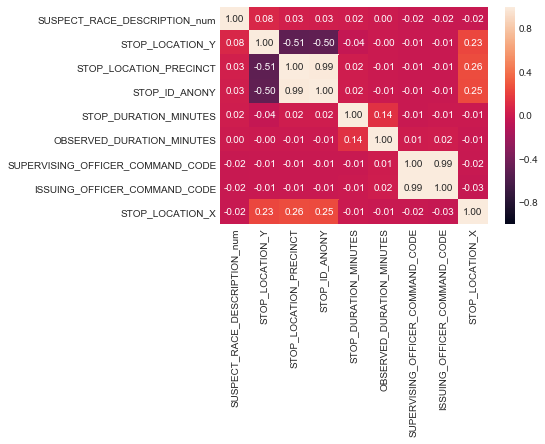

In [96]:
#The strength of correlation is measured from 1 to -1
#The closer to 0, the weaker the correlation
#The closer to 1 or -1, the stronger the correlation
cols = sqf.corr().nlargest(10, 'SUSPECT_RACE_DESCRIPTION_num')['SUSPECT_RACE_DESCRIPTION_num'].index
corr_mat = np.corrcoef(sqf[cols].values.T)
sns.heatmap(corr_mat, vmin=-1, vmax=+1, annot=True, fmt='.2f'
            , xticklabels=cols.values, yticklabels=cols.values);